In [4]:
from preprocessor import *
#reading the data
data = pd.read_csv('Training.csv' )

#sort the df by ascending years and descending hapiness scores
#data.sort_values(['Year','Happiness Score'],ascending=[True,False],inplace=True)

#display first 10 rows
#data.head(10)
df = data.loc[data['prognosis'] == 'Malaria']
#ax = dx.plot.hist(bins=10, alpha=0.5)

             symptoms
chills            114
vomiting          114
high_fever        114
sweating          114
headache          114
nausea            114
diarrhoea         108
muscle_pain       120


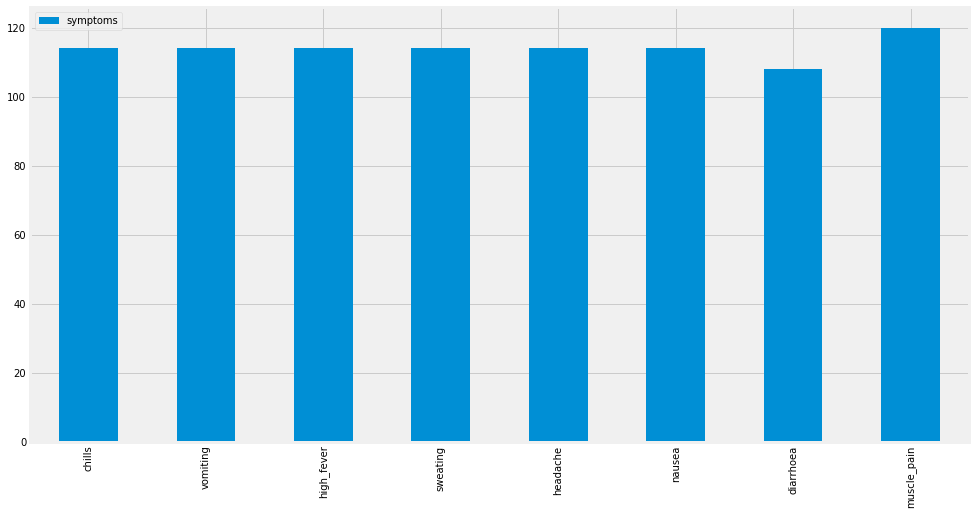

In [5]:
df = df.drop('prognosis',axis=1)
y= df.sum(axis=0,skipna=True)
k = pd.DataFrame(y,columns = ['symptoms'])

kx = k.loc[~(k['symptoms'] == 0)]
#kx.reset_index()
print(kx)
kx.plot(kind= 'bar',figsize=(15,8));


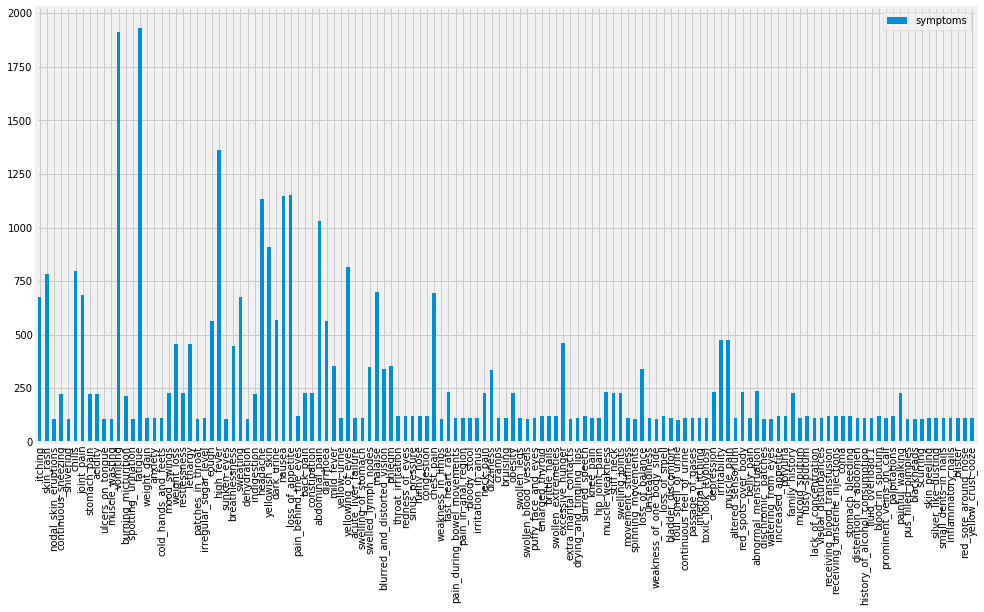

In [6]:
data = data.drop('prognosis',axis=1)
y= data.sum(axis=0,skipna=True)
k = pd.DataFrame(y,columns = ['symptoms'])

kx = k.loc[~(k['symptoms'] == 0)]
#kx.reset_index()
kx.plot(kind= 'bar',figsize=(15,8));
